### Data Preprocessing

In [70]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [72]:
df.head()
df.columns.values
df.dtypes
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.850000,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.500000,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.150002,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.750000,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.649994,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

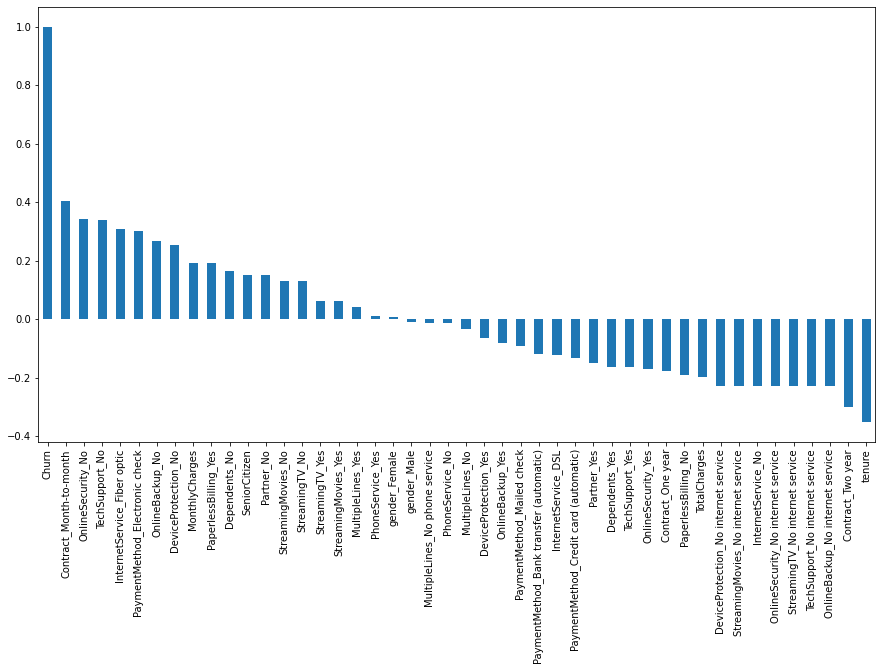

In [74]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

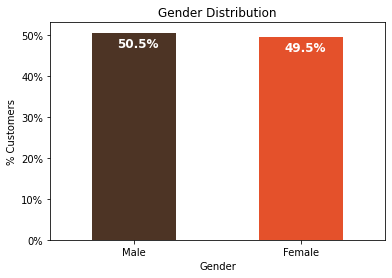

In [75]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

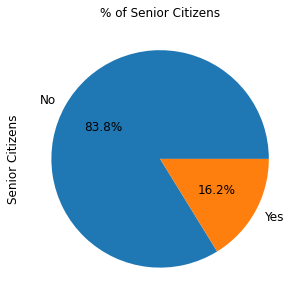

In [76]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

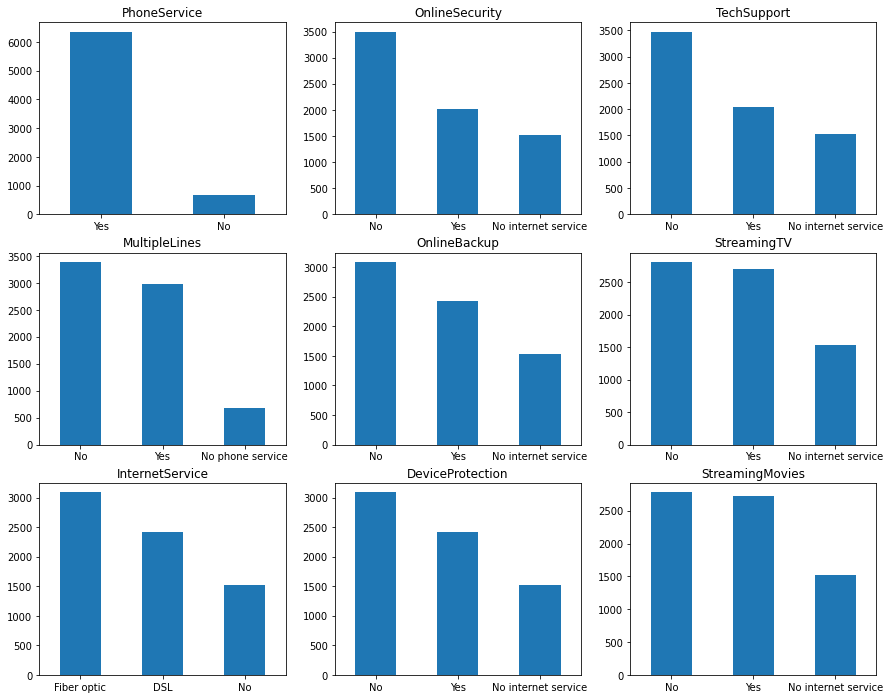

In [77]:
df.columns.values
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

In [78]:
cat_features = df.drop(['customerID','TotalCharges', 'MonthlyCharges', 'SeniorCitizen', 'tenure', 'Churn'],axis=1).columns
cat_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [79]:
df[cat_features].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [80]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[cat_features])

OneHotEncoder(sparse=False)

In [81]:
dff = ohe.transform(df[cat_features])
dff = pd.DataFrame(dff, columns=ohe.get_feature_names())
dff = pd.concat([dff, df[['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure']]], axis=1)

C:\python3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
dff.head()

,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_No phone service,...,x13_No,x13_Yes,x14_Bank transfer (automatic),x14_Credit card (automatic),x14_Electronic check,x14_Mailed check,SeniorCitizen,MonthlyCharges,TotalCharges,tenure
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,29.85,29.850000,1
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,56.95,1889.500000,34
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,53.85,108.150002,2
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,42.30,1840.750000,45
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,70.70,151.649994,2


In [83]:
bin_dict = {'No':0, 'Yes':1}
df.Churn = df.Churn.map(bin_dict)

### Modeling

In [84]:
from sklearn.model_selection import train_test_split

X = dff.values
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [85]:
print(df.shape)
print("\n")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

(7043, 21)


X_train:  (5282, 45)
y_train:  (5282,)
X_test:  (1761, 45)
y_test:  (1761,)


### SVM

In [86]:
# Fitting classifier to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_pipe = Pipeline(steps)

In [87]:
%%time
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [10],
               'model__gamma' : ['scale'],
               'model__random_state' : [42],
               'model__degree' : [1]
}
classifier_svm = GridSearchCV(svm_pipe, parameters, scoring='accuracy', verbose=10, cv=6, n_jobs=-1)
classifier_svm = classifier_svm.fit(X_train, y_train.ravel())

Fitting 6 folds for each of 1 candidates, totalling 6 fits
CPU times: total: 18 s
Wall time: 42.8 s


In [88]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)

y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.7995077622112836
Test set:  0.8023850085178875


In [89]:
filename = 'data/svm_model.sav'
pickle.dump(classifier_svm, open(filename, 'wb'))


### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
accuracy_LR_test = accuracy_score(y_test, prediction_test)
print("Test set: ", accuracy_LR_test)

Test set:  0.80465644520159


C:\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8029528676888131


### ADABoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8040885860306644

### XGBoost

In [93]:
import xgboost as xgb

steps = [
    ('scalar', StandardScaler()),
    ('model', xgb.XGBClassifier())
]
xgb_pipe = Pipeline(steps)

In [94]:
%%time
parameters = { 'model__min_child_weight': [10],
        'model__gamma': [5],
        'model__subsample': [0.6],
        'model__colsample_bytree': [0.6],
        'model__max_depth': [3],
        'model__random_state' : [42]
}
classifier_xgb = GridSearchCV(xgb_pipe, parameters, scoring='accuracy', verbose=10, cv=6, n_jobs=-1)
classifier_xgb = classifier_xgb.fit(X_train, y_train.ravel())

Fitting 6 folds for each of 1 candidates, totalling 6 fits


C:\python3.8\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 4.42 s
Wall time: 12 s


In [95]:
y_pred_xgb_train = classifier_xgb.predict(X_train)
accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
print("Training set: ", accuracy_xgb_train)

y_pred_xgb_test = classifier_xgb.predict(X_test)
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)
print("Test set: ", accuracy_xgb_test)

Training set:  0.8207118515713745
Test set:  0.8035207268597387


In [96]:
filename = 'data/xgb_model.sav'
pickle.dump(classifier_xgb, open(filename, 'wb'))

### Artificial Neural Network

In [100]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=4,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))   
ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=16,epochs=50)

Epoch 1/50
331/331 [==============================] - 1s 2ms/step - loss: 0.6655 - accuracy: 0.7437
Epoch 2/50
331/331 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7864
Epoch 3/50
331/331 [==============================] - 0s 979us/step - loss: 0.5351 - accuracy: 0.7810
Epoch 4/50
331/331 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.7860
Epoch 5/50
331/331 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7871
Epoch 6/50
331/331 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7726
Epoch 7/50
331/331 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7895
Epoch 8/50
331/331 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7893
Epoch 9/50
331/331 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.7945
Epoch 10/50
331/331 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.78

In [101]:
from sklearn.metrics import classification_report
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1293
           1       0.68      0.51      0.59       468

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761

